In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first().date
recent_date

'2017-08-23'

<function matplotlib.pyplot.show(close=None, block=None)>

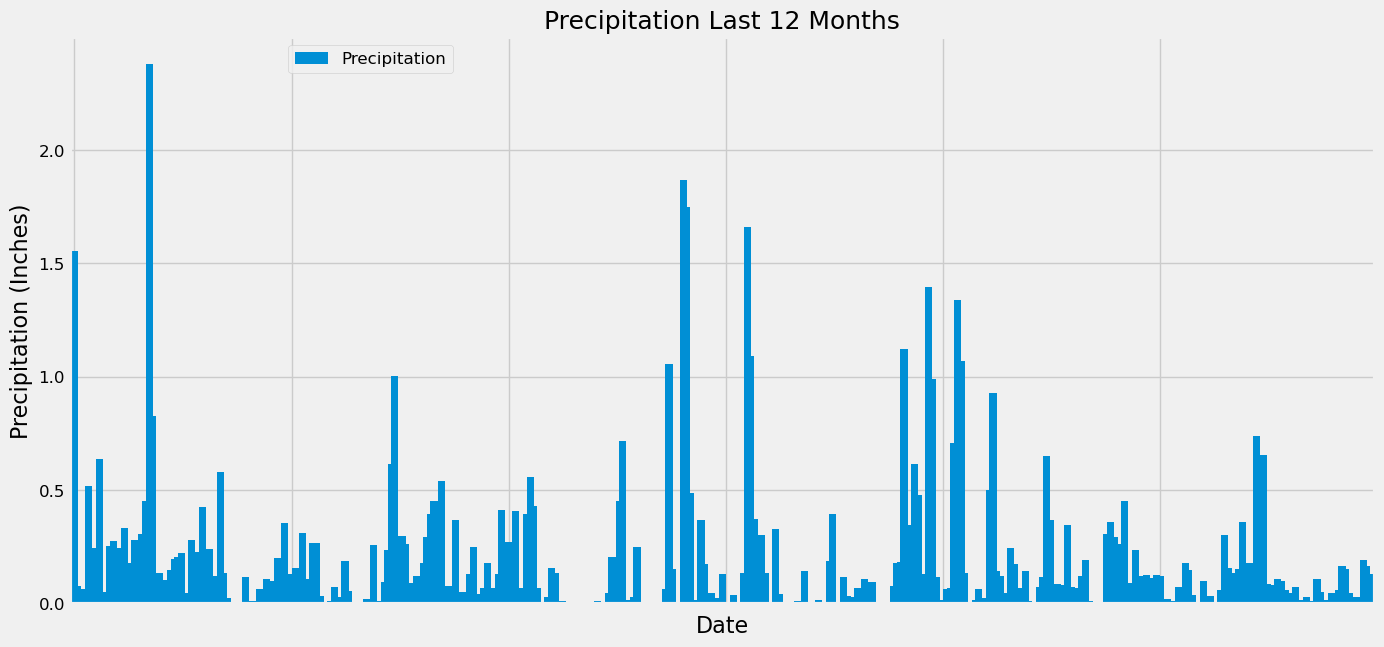

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.




# Calculate the date one year from the last date in data set.
prev_twelve_months = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)
prev_twelve_months

# Perform a query to retrieve the data and precipitation scores
rain_results = session.query(measurement.date, func.avg(measurement.prcp)).\
                    filter(measurement.date >= prev_twelve_months).\
                    group_by(measurement.date).all()
rain_results

# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(rain_results, columns=['Date', 'Precipitation'])
rain_df.set_index('Date', inplace=True)
rain_df.head()

# Sort the dataframe by date

rain_df_sorted = rain_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
ax = rain_df.plot(kind='bar', width=2, figsize=(15,7))
plt.locator_params(axis='x', nbins=6)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.tick_params(axis='y', labelsize=12)
ax.grid(True)
plt.legend(bbox_to_anchor=(.3,1), fontsize="12")
plt.title("Precipitation Last 12 Months", size=18)
plt.ylabel("Precipitation (Inches)", size=16)
plt.xlabel("Date", size=16)
plt.savefig("../Precipitation.png")
plt.show



In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [28]:
# Design a query to calculate the total number stations in the dataset
session.query(station.id).count()

9

In [29]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_results = session.query(measurement.station, func.count(measurement.station)).\
            group_by(measurement.station).\
            order_by(func.count(measurement.station).desc()).all()
station_results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_results[0][0]
session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
                filter(measurement.station == most_active_station).all()

[(54.0, 71.66378066378067, 85.0)]

In [31]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [32]:
# Close Session
session.close()